# Catalog exploration example

In [1]:
import intake
from fresca_catalog import search_catalog_variables, filter_catalog, map_datasets

In [2]:
catalog = intake.open_catalog('full_catalog.yml')
catalog

Catalog
 named datasets: ['CRCP_Carbonate_Chemistry_Atlantic', 'SFER_data']
  parameters: ['CATALOG_DIR', 'CATALOG_PATH', 'STORAGE_OPTIONS']

In [3]:
help(search_catalog_variables)

Help on function search_catalog_variables in module fresca_catalog:

search_catalog_variables(catalog, query=None, case_insensitive=True, fuzzy=False) -> List[str]
    Searches the catalog for variables.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to search.
    query : str, optional
        The query to search for. If not provided, all variables are returned.
    case_insensitive : bool, optional
        Whether to perform a case-insensitive search. Default is True.
    fuzzy : bool, optional
        Whether to perform a fuzzy search. Default is False.
    
    Returns
    -------
    list
        A list of matching variables.



In [4]:
search_catalog_variables(catalog, 'ph')

['avg_phaeo', 'pH_calculated', 'pH_measured']

In [5]:
search_catalog_variables(catalog, 'temp')

['temp', 'Temperature_C']

In [6]:
help(filter_catalog)

Help on function filter_catalog in module fresca_catalog:

filter_catalog(catalog: intake.readers.entry.Catalog, entry_names: List[str] = None, variables: List[str] = None, time_range: Tuple[str, str] = None, bbox: Tuple[float, float, float, float] = None) -> intake.readers.entry.Catalog
    Filters a catalog based on the provided criteria.
    
    Parameters
    ----------
    catalog : Catalog
        The catalog to filter.
    entries : list, optional
        The entries to be used for filtering.
    variables : list, optional
        The variables to be used for filtering.
    time_range : list, optional
        The time range to be used for filtering, formatted as [min_time, max_time].
    bbox : list, optional
        The bounding box to be used for filtering, formatted as [min_lon, min_lat, max_lon, max_lat].
    
    Returns
    -------
    Catalog
        The filtered catalog.



In [7]:
my_catalog = filter_catalog(catalog, variables=['temp', 'Temperature_C'])
my_catalog

Catalog
 named datasets: ['CRCP_Carbonate_Chemistry_Atlantic', 'SFER_data']

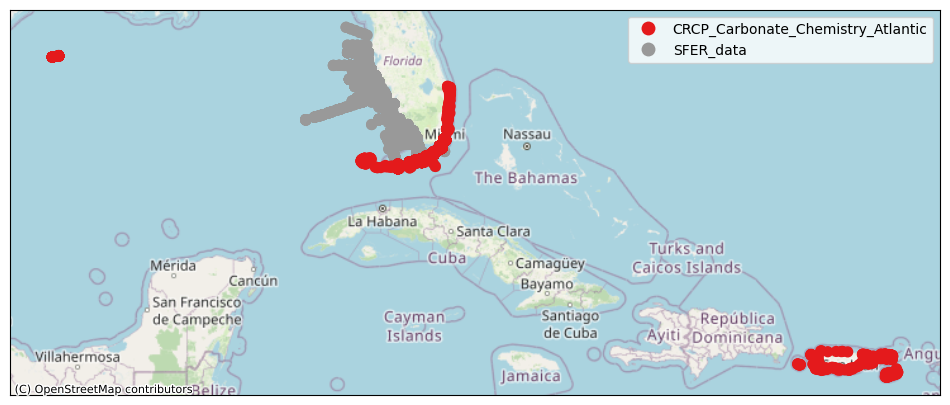

In [8]:
map_datasets(my_catalog)

In [9]:
my_catalog = filter_catalog(
    catalog,
    variables=['temp', 'Temperature_C'],
    time_range=('2023-12-01T13:23:00Z', '2024-11-17T23:54:00Z'),
    bbox=(70.0, 20.0, 90.0, 40.0)
)
my_catalog

Catalog
 named datasets: ['SFER_data']

In [10]:
my_catalog['SFER_data'].metadata

{'lat_col': 'lat_dec',
 'lon_col': 'lon_dec',
 'maxLatitude': 28.7841,
 'maxLongitude': 85.0221,
 'maxTime': '2024-11-17T23:54:00Z',
 'minLatitude': 24.3952,
 'minLongitude': 80.0442,
 'minTime': '2014-12-01T13:23:00Z',
 'time_col': 'datetime',
 'variables': ['keyfield',
  'cruise_id',
  'year',
  'month',
  'day',
  'time',
  'datetime',
  'lat_deg',
  'lat_min',
  'lat_dec',
  'lon_deg',
  'lon_min',
  'lon_dec',
  'station',
  'station_type',
  'depth',
  'depth_class',
  'depth_order',
  'cast',
  'nisk_start',
  'nisk_end',
  'net_tow_500',
  'net_tow_200',
  'net_tow_64',
  'plank_image',
  'insitu_rrs',
  'temp',
  'sal',
  'o2_ctd',
  'o2_disc',
  'nh4',
  'no2',
  'no3',
  'no3_no2',
  'po4',
  'si',
  'avg_chl_a',
  'avg_phaeo',
  'notes']}

In [11]:
df = my_catalog['SFER_data'].read()
df.head()

,keyfield,cruise_id,year,month,day,time,datetime,lat_deg,lat_min,lat_dec,...,o2_disc,nh4,no2,no3,no3_no2,po4,si,avg_chl_a,avg_phaeo,notes
0,20140112_1323_WS14335_1_0_Surf,WS14335,2014.0,12,1.0,13:23,2014-12-01 13:23:00,25.0,38.6984,25.6450,...,NaN,1.51,0.04,0.19,0.23,0.26,0.1,1.08,0.79,NaN
1,20140112_1332_WS14335_2_0_Surf,WS14335,2014.0,12,1.0,13:32,2014-12-01 13:32:00,25.0,38.4917,25.6415,...,NaN,3.32,0.06,0.16,0.21,0.32,0.1,1.09,0.24,NaN
2,20140112_1353_WS14335_3_0_Surf,WS14335,2014.0,12,1.0,13:53,2014-12-01 13:53:00,25.0,38.7510,25.6458,...,NaN,1.03,0.07,0.07,0.15,0.31,0.3,0.68,0.14,NaN
3,20140112_1710_WS14335_EKIN_0_Surf,WS14335,2014.0,12,1.0,17:10,2014-12-01 17:10:00,25.0,20.0186,25.3336,...,NaN,2.69,0.11,0.20,0.31,0.39,0.5,0.82,0.30,NaN
4,20140112_1721_WS14335_EKMID_0_Surf,WS14335,2014.0,12,1.0,17:21,2014-12-01 17:21:00,25.0,18.9835,25.3164,...,NaN,1.13,0.07,0.07,0.14,0.27,0.1,2.16,0.21,NaN


In [12]:
df.to_csv('my_data.csv', index=False)

In [13]:
my_catalog.to_yaml_file('my_catalog.yaml')